In [1]:
!pip install keras
!pip install --upgrade keras
!pip install opencv-python


In [2]:
import string
import numpy as np
import os
import cv2
from pickle import dump, load

from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import concatenate

from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout

from tqdm.notebook import tqdm as tqdm
tqdm().pandas()

0it [00:00, ?it/s]

In [3]:
# Load a text file into memory
def load_doc(filename):
    # Open the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# Obtain captions of all images
def all_img_captions(filename):
    file = load_doc(filename)
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [caption]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions

# Data cleaning: lowercasing & removing puntuations/words containing numbers
def cleaning_text(captions):
    table = str.maketrans('','',string.punctuation)
    for img, caps in captions.items():
        for i, img_caption in enumerate(caps):

            img_caption.replace('-',' ')
            desc = img_caption.split()

            # Lowercasing
            desc = [word.lower() for word in desc]
            # Removing punctuation from each token
            desc = [word.translate(table) for word in desc]
            # Removing hanging 's and a 
            desc = [word for word in desc if(len(word)>1)]
            # Removing tokens with numbers in them
            desc = [word for word in desc if(word.isalpha())]
            # Converting back to string

            img_caption = ' '.join(desc)
            captions[img][i]= img_caption
    return captions

# Build vocabulary of all unique words
def text_vocabulary(descriptions):
    vocab = set()
    
    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]
    
    return vocab

# All descriptions in one file 
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + '\t' + desc )
    data = '\n'.join(lines)
    file = open(filename,'w')
    file.write(data)
    file.close()
    


In [4]:
import pandas as pd

# Function to read captions from a CSV file
def read_captions_from_csv(file_path):
    df = pd.read_csv(file_path)
    captions_dict = {}
    for index, row in df.iterrows():
        img_name = row['image']
        caption = row['caption']
        if img_name not in captions_dict:
            captions_dict[img_name] = []
        captions_dict[img_name].append(caption)
    return captions_dict

# Prepare our text data
captions_file = "captions.txt"
# Load captions from the CSV file
descriptions = read_captions_from_csv(captions_file)
print("Length of descriptions =", len(descriptions))

# Clean the descriptions
clean_descriptions = cleaning_text(descriptions)

# Building vocabulary 
vocabulary = text_vocabulary(clean_descriptions)
print("Length of vocabulary =", len(vocabulary))

# saving each description to file 
save_descriptions(clean_descriptions, "descriptions.txt")


Length of descriptions = 8091
Length of vocabulary = 8763


In [5]:
def extract_features(directory):
        model = Xception(include_top=False, pooling='avg')
        features = {}
        for img in tqdm(os.listdir(directory)):
            filename = directory + "/" + img
            image = cv2.imread(filename, -1)
            image = cv2.resize(image, (299, 299))
            # for images that has 4 channels, we convert them into 3 channels
            if image.shape[2] == 4:
                image = image[..., :3]
            image = np.expand_dims(image, axis=0)
#             image = preprocess_input(image)
            image = image / 127.5
            image = image - 1.0
            
            feature = model.predict(image)
            features[img] = feature
        return features

In [6]:
# 2048 feature vector
features = extract_features('Images')
dump(features, open("features.p","wb"))

  0%|          | 0/8091 [00:00<?, ?it/s]

1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 127ms/step


1/1 [==============================] - 0s 127ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 98ms/step


In [11]:
# Load the image data 
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos

# Load clean_descriptions
def load_clean_descriptions(filename, photos):   
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):
        
        words = line.split()
        if len(words)<1 :
            continue
    
        image, image_caption = words[0], words[1:]
        
        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[image].append(desc)

    return descriptions

# Load all features
def load_features(photos):
    all_features = load(open("features.p","rb"))
    # Select only the features needed
    features = {k:all_features[k] for k in photos}
    return features

In [12]:
# Load captions from the CSV file
captions_dict = read_captions_from_csv(captions_file)

# Extract unique image names
train_imgs = list(captions_dict.keys())

# Load clean descriptions for training images
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)

# Load features for training images
train_features = load_features(train_imgs)


In [13]:
# Convert dictionary to clean list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

# Create tokenizer class to vectorise text corpus
# Each integer will represent token in dictionary 
from keras.preprocessing.text import Tokenizer

def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

In [14]:
# Give each word a index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size 

8764

In [15]:
#calculate maximum length of descriptions
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)

max_length = max_length(descriptions)
max_length

32

In [16]:
features['1000268201_693b08cb0e.jpg'][0]

array([0.35702342, 0.05299868, 0.10780945, ..., 0.06248762, 0.02322124,
       0.25095773], dtype=float32)

In [17]:
# Create input-output sequence pairs from the image description.

# Data generator, used by model.fit_generator()
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
            # Retrieve photo features
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield [input_image, input_sequence], output_word

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    # Walk through each description for the image
    for desc in desc_list:
        # Encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # Split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # Split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # Pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # Encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # Store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

In [18]:
[a, b], c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape

((47, 2048), (47, 32), (47, 8764))

In [19]:
from keras.utils import plot_model

# Define the captioning model
def define_model(vocab_size, max_length):
    
    # Features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    
    # Tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    # Summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)
    
    return model

In [20]:
# Train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train =', len(train_descriptions))
print('Photos: train= ', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)


from keras.layers import add


model = define_model(vocab_size, max_length)
epochs = 15
steps = len(train_descriptions)

# Make a directory models to save our models if not already exists
if not os.path.isdir("./models"):
    os.mkdir("models")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save("models/model_" + str(i) + ".keras")

Dataset:  8091
Descriptions: train = 8091
Photos: train=  8091
Vocabulary Size: 8764
Description Length:  32

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 32, 256)              2243584   ['input_3[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 2048)                 0         ['input_2[0][0]

In [35]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.applications.xception import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.xception import Xception
import numpy as np

# Load the saved model
saved_model_path = "models/model_13.keras"
loaded_model = load_model(saved_model_path)

In [22]:
# Function to extract features from a new image
def extract_features(filename):
    model = Xception(include_top=False, pooling='avg')
    image = load_img(filename, target_size=(299, 299))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    feature = model.predict(image)
    return feature

def generate_caption(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = word_for_id(yhat, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq' or word == 'end':
            break

    # Remove the 'startseq' and 'endseq' tokens from the generated caption
    caption = in_text.split()[1:-1]
    caption = ' '.join(caption)
    return caption



# Function to map an integer to its corresponding word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


In [23]:
max_length

32

1/1 [==============================] - 1s 1s/step


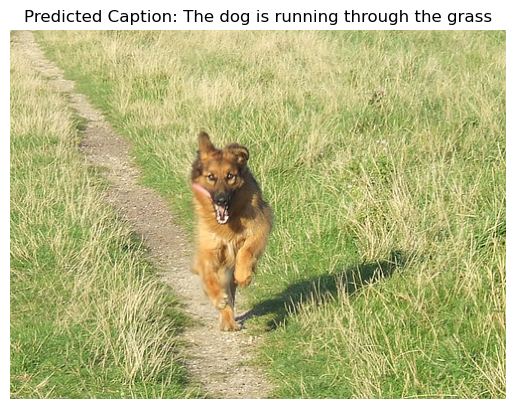

In [36]:
import matplotlib.pyplot as plt
from PIL import Image

new_image_path = 'Images/240696675_7d05193aa0.jpg'
new_photo = extract_features(new_image_path)
caption = generate_caption(loaded_model, tokenizer, new_photo, max_length)

# Capitalize the first letter of the predicted caption
caption = caption.capitalize()

# Display the image
image = Image.open(new_image_path)
plt.imshow(image)
plt.axis('off')

# Display the predicted caption
plt.title("Predicted Caption: " + caption)
plt.show()


1/1 [==============================] - 1s 1s/step


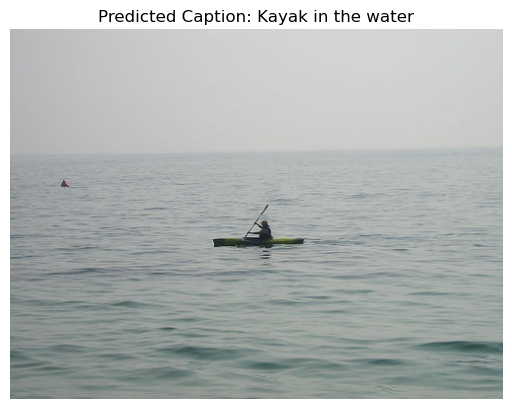

In [37]:
import matplotlib.pyplot as plt
from PIL import Image

new_image_path = 'Images/19212715_20476497a3.jpg'
new_photo = extract_features(new_image_path)
caption = generate_caption(loaded_model, tokenizer, new_photo, max_length)

# Capitalize the first letter of the predicted caption
caption = caption.capitalize()

# Display the image
image = Image.open(new_image_path)
plt.imshow(image)
plt.axis('off')

# Display the predicted caption
plt.title("Predicted Caption: " + caption)
plt.show()

1/1 [==============================] - 1s 1s/step


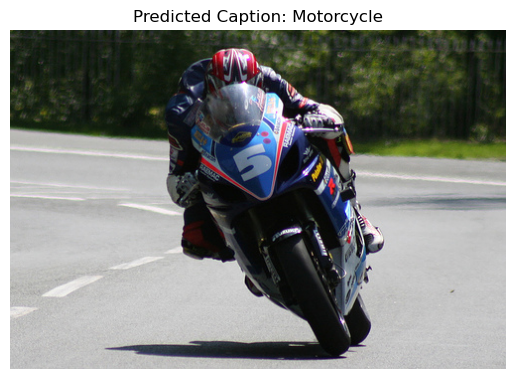

In [38]:
import matplotlib.pyplot as plt
from PIL import Image

new_image_path = 'Images/166433861_70b66cd381.jpg'
new_photo = extract_features(new_image_path)
caption = generate_caption(loaded_model, tokenizer, new_photo, max_length)

# Capitalize the first letter of the predicted caption
caption = caption.capitalize()

# Display the image
image = Image.open(new_image_path)
plt.imshow(image)
plt.axis('off')

# Display the predicted caption
plt.title("Predicted Caption: " + caption)
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

new_image_path = 'Images/240696675_7d05193aa0.jpg'
new_photo = extract_features(new_image_path)
caption = generate_caption(loaded_model, tokenizer, new_photo, max_length)

# Load actual captions for testing set
actual_captions = ["A brown dog is running in a grassy plain", "A brown dog runs along a path in the grass","Dog running in field","Dog running on narrow dirt path","The dog is running along a path that has been made through the uncut grass"]

# Convert actual and predicted captions to numeric representation
actual_sequences = [tokenizer.texts_to_sequences([caption])[0] for caption in actual_captions]
predicted_sequences = [tokenizer.texts_to_sequences([caption])[0] for _ in range(len(actual_captions))]

# Pad sequences if necessary
max_length = 32
actual_sequences = pad_sequences(actual_sequences, maxlen=max_length)
predicted_sequences = pad_sequences(predicted_sequences, maxlen=max_length)

# Convert to numpy arrays
actual_sequences = np.array(actual_sequences)
predicted_sequences = np.array(predicted_sequences)

# Calculate MAE
mae = mean_absolute_error(actual_sequences, predicted_sequences)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(actual_sequences, predicted_sequences)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(actual_sequences, predicted_sequences)
print(f"R-squared (R2) Score: {r2}")


1/1 [==============================] - 1s 1s/step
Mean Absolute Error (MAE): 51.54375
Mean Squared Error (MSE): 60987.18125000001
Root Mean Squared Error (RMSE): 246.95582854024727
R-squared (R2) Score: 0.44357510887496393
